#                                       Black Friday Sales Prediction


A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

# Importing all nessasary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the training data set

In [2]:
pd.options.display.max_rows = 500000
train_file = pd.read_csv('train.csv')
pd.options.display.max_rows = 500000
train_file

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


# Changing the maximum column width to 100. Default is 20

In [3]:
pd.options.display.max_columns = 100

In [4]:
train_file['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

# checking for NaN values

In [5]:
Missing_values = train_file.isnull().sum().sort_values(ascending = False)

In [6]:
print(Missing_values)

Product_Category_3            383247
Product_Category_2            173638
Purchase                           0
Product_Category_1                 0
Marital_Status                     0
Stay_In_Current_City_Years         0
City_Category                      0
Occupation                         0
Age                                0
Gender                             0
Product_ID                         0
User_ID                            0
dtype: int64


# Seeing all the information

In [7]:
train_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


# Checking the percentage of NaN involved

In [8]:
isnull = train_file.isnull()

In [9]:
percent = isnull.sum() /len(isnull) * 100

In [10]:
sorted_ = percent.sort_values(ascending = False)

In [11]:
print(sorted_)

Product_Category_3            69.672659
Product_Category_2            31.566643
Purchase                       0.000000
Product_Category_1             0.000000
Marital_Status                 0.000000
Stay_In_Current_City_Years     0.000000
City_Category                  0.000000
Occupation                     0.000000
Age                            0.000000
Gender                         0.000000
Product_ID                     0.000000
User_ID                        0.000000
dtype: float64


# On the above observation understood that the data has less missing values and can't be dropped

# filling nan values

# Trying to plot product cat 2 and 3 before and after filling NA
# 1. before filling na product cat 2

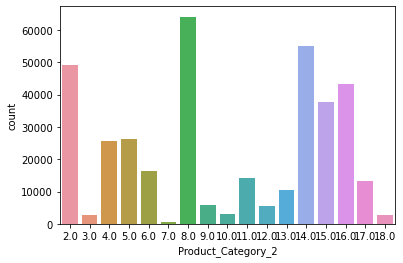

In [12]:
sns.countplot(train_file['Product_Category_2'])

In [13]:
train_file['Product_Category_2'] = train_file['Product_Category_2'].fillna(train_file['Product_Category_2'].mode()[0])

# 1. After filling na product cat 2

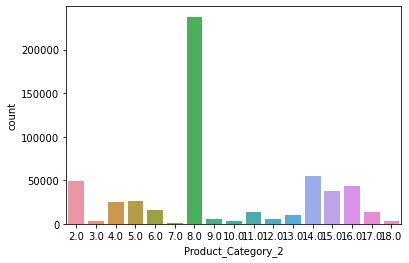

In [14]:
sns.countplot(train_file['Product_Category_2'])

# # 1. before filling na product cat 3

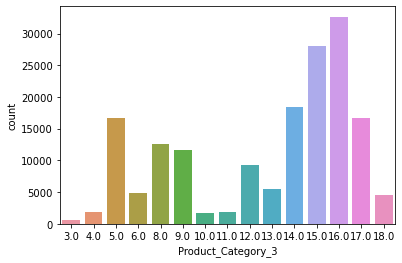

In [15]:
sns.countplot(train_file['Product_Category_3'])

In [16]:
train_file['Product_Category_3'] = train_file['Product_Category_3'].fillna(train_file['Product_Category_3'].mode()[0])

# After filling na product cat 3

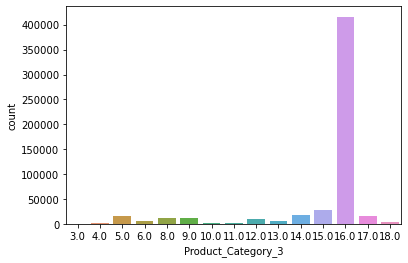

In [17]:
sns.countplot(train_file['Product_Category_3'])

In [18]:
print(train_file['Product_Category_3'].unique())
print('_______________________')
print(train_file['Product_Category_2'].unique())

[16. 14. 17.  5.  4. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]
_______________________
[ 8.  6. 14.  2. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]


In [19]:
#train_file['Product_Category_3'] = train_file['Product_Category_3'].fillna(train_file['Product_Category_3'].mode()[0])
#train_file['Product_Category_2'] = train_file['Product_Category_2'].fillna(train_file['Product_Category_2'].mode()[0])

In [20]:
train_file.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

# missing values are replaced

# Using pair plot to see the relationship within features

In [21]:
train_file.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

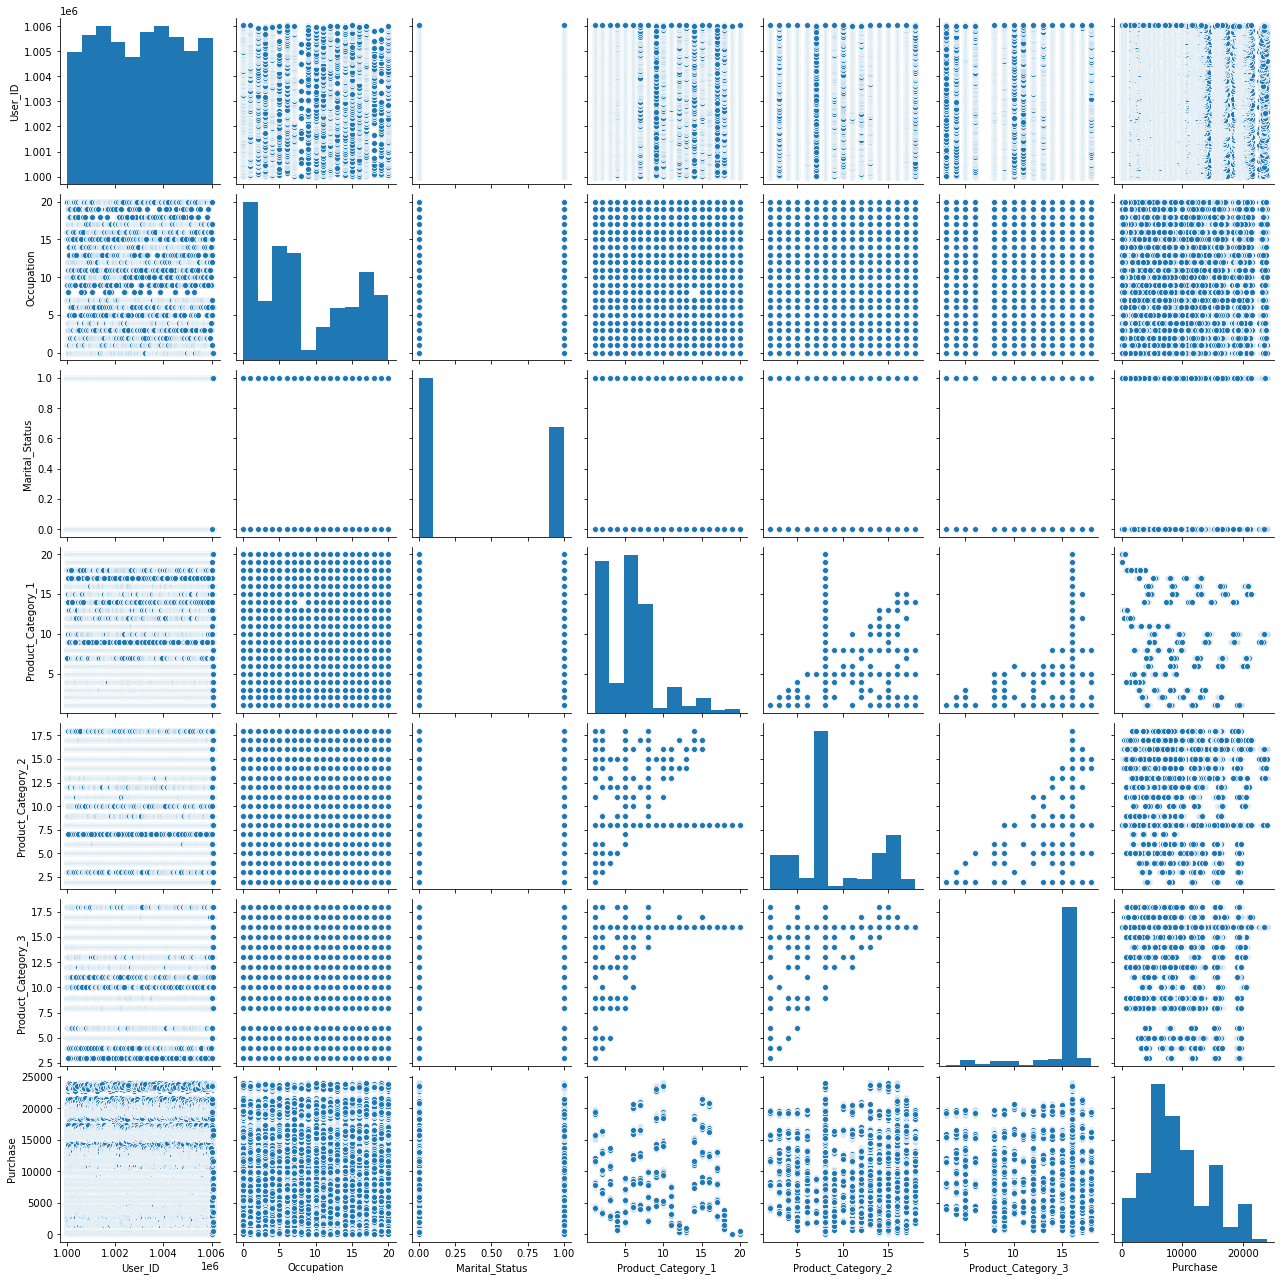

In [22]:
sns.pairplot(train_file)

In [23]:
train_file.head(50)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,16.0,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,16.0,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,16.0,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,8.0,16.0,7871


# Dropping User_ID

In [24]:
train_file.drop(['User_ID'], axis = 1, inplace = True)

In [25]:
train_file.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969


# Fininding the correlation between gender and product_cat 1

# cat 1 has been purchased by F more than M

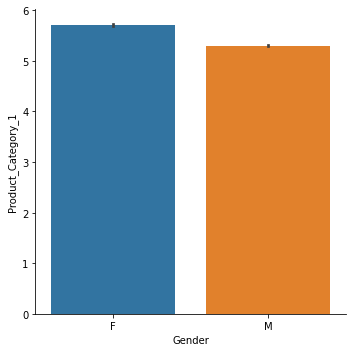

In [26]:
sns.catplot(x="Gender", y="Product_Category_1", kind="bar", data=train_file)

# cat 2 has been purchased by F more than M

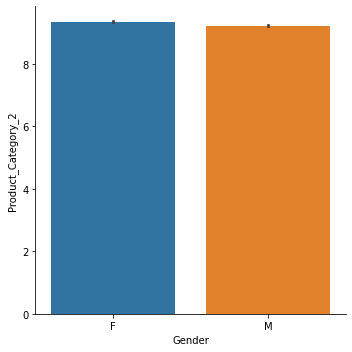

In [27]:
sns.catplot(x="Gender", y="Product_Category_2", kind="bar", data=train_file)

# cat 3 has been purchased equally by men and woman

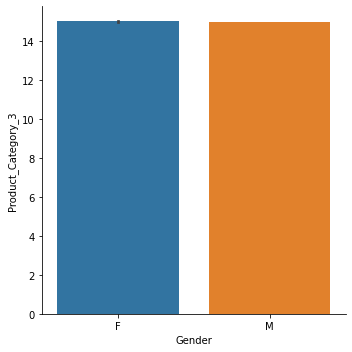

In [28]:
sns.catplot(x="Gender", y="Product_Category_3", kind="bar", data=train_file)

In [29]:
cat123 = train_file.iloc[:,6:9]

In [30]:
cat123

,Marital_Status,Product_Category_1,Product_Category_2
0,0,3,8.0
1,0,1,6.0
2,0,12,8.0
3,0,12,14.0
4,0,8,8.0
...,...,...,...
550063,1,20,8.0
550064,0,20,8.0
550065,1,20,8.0
550066,0,20,8.0


In [31]:
purchase_ = train_file['Purchase']

In [32]:
purchase_

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

In [33]:
cat123_purchase = pd.concat([cat123,purchase_], axis = 1)

In [34]:
cat123_purchase

,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0,3,8.0,8370
1,0,1,6.0,15200
2,0,12,8.0,1422
3,0,12,14.0,1057
4,0,8,8.0,7969
...,...,...,...,...
550063,1,20,8.0,368
550064,0,20,8.0,371
550065,1,20,8.0,137
550066,0,20,8.0,365


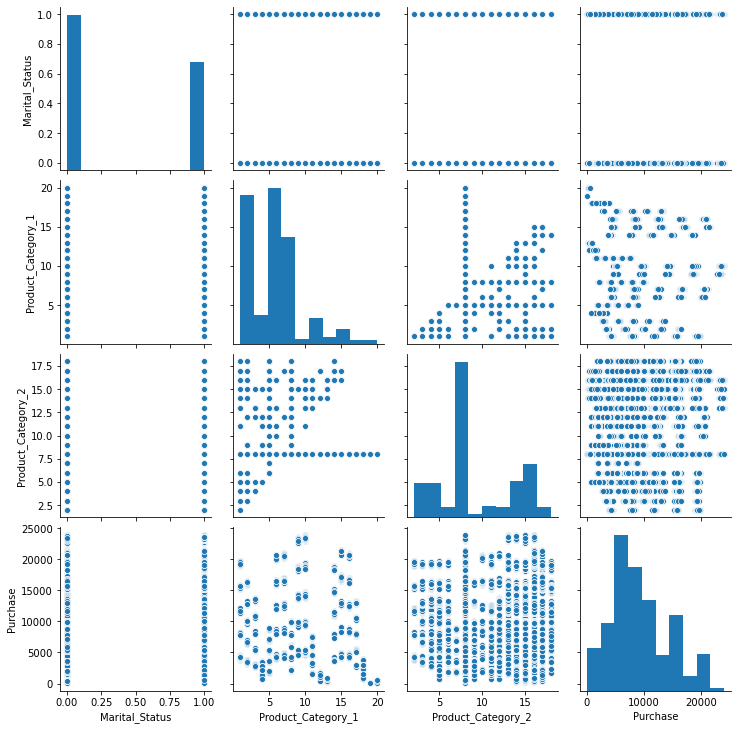

In [35]:
sns.pairplot(cat123_purchase)

# by the above observation, we understood that 
# Product_category 2 > Product_category 3  > Product_category 1

In [36]:
train_file

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,M,51-55,13,B,1,1,20,8.0,16.0,368
550064,P00375436,F,26-35,1,C,3,0,20,8.0,16.0,371
550065,P00375436,F,26-35,15,B,4+,1,20,8.0,16.0,137
550066,P00375436,F,55+,1,C,2,0,20,8.0,16.0,365


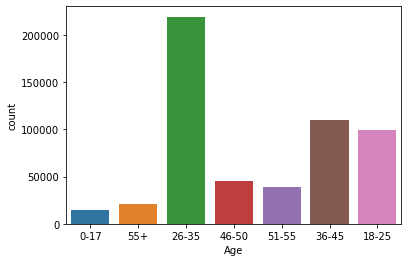

In [37]:
sns.countplot(train_file['Age'])

The record has more number youngsters. Between 26-35

In [38]:
train_file.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

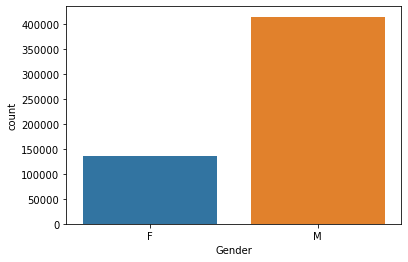

In [39]:
sns.countplot(train_file['Gender'])

The record has more number Males.

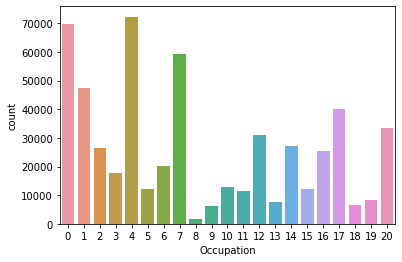

In [40]:
sns.countplot(train_file['Occupation'])

# Occupation category 0, 4 & 7 are the highest

In [41]:
train_file.groupby(by='Age').mean()['Purchase']

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

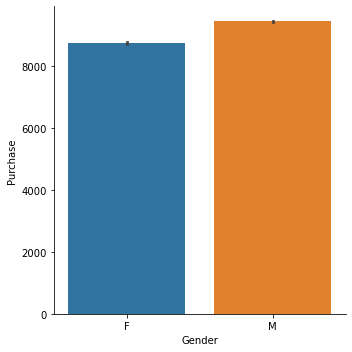

In [44]:
#unique_ = print(unique_)
sns.catplot(x="Gender", y="Purchase", kind="bar", data=train_file)
# The observations says that the Males are purchasing more than women.

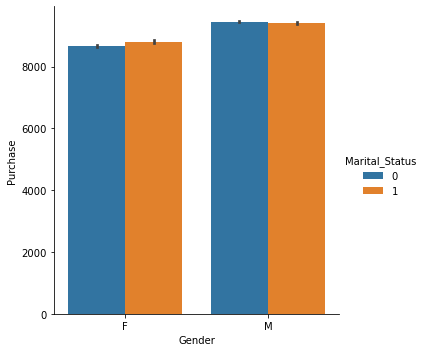

In [45]:
sns.catplot(x="Gender", y="Purchase", hue = 'Marital_Status',kind="bar", data=train_file)

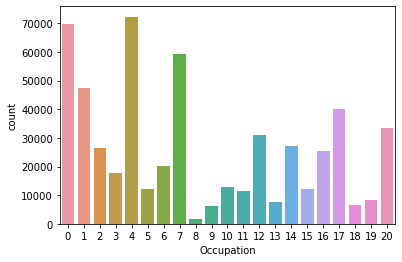

In [46]:
sns.countplot(train_file['Occupation']) # 4 is the most and how to find wat product they have bought

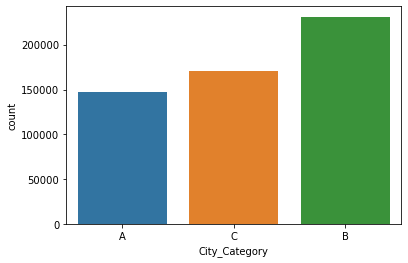

In [47]:
sns.countplot(train_file['City_Category'])

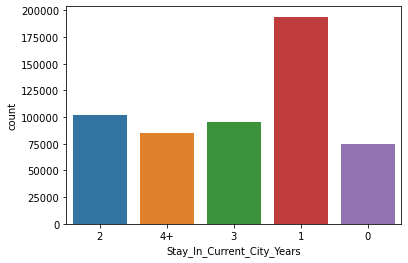

In [48]:
sns.countplot(train_file['Stay_In_Current_City_Years'])

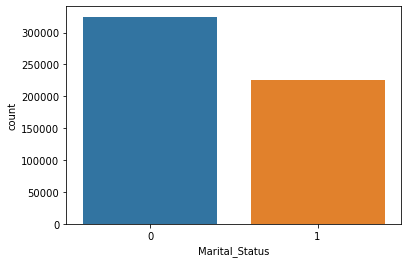

In [49]:
sns.countplot(train_file['Marital_Status'])

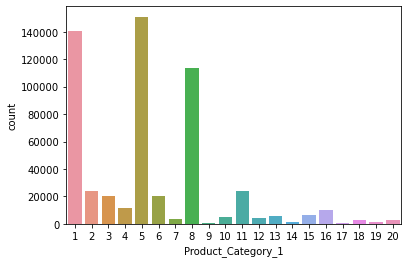

In [50]:
sns.countplot(train_file['Product_Category_1']) # which age group has bought this more
# in this category the most sold item is 5

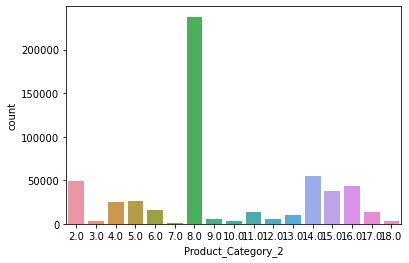

In [51]:
sns.countplot(train_file['Product_Category_2']) # which age group has bought this more
# in this category the most sold item is 8.0

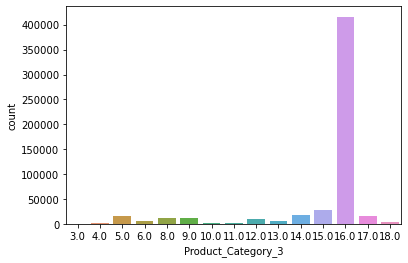

In [52]:
sns.countplot(train_file['Product_Category_3'])# which age group has bought this more
# in this category the most sold item is 16

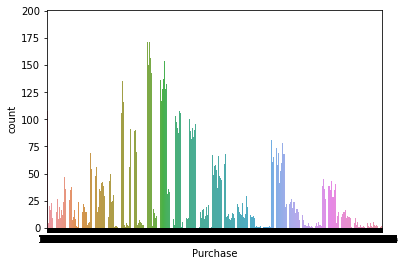

In [53]:
sns.countplot(train_file['Purchase'])

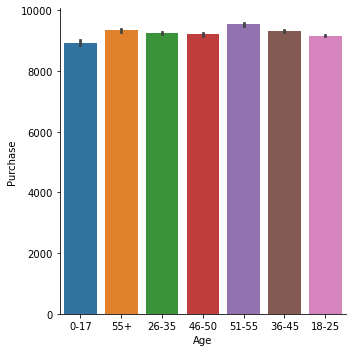

In [54]:
sns.catplot(x="Age", y="Purchase", kind="bar", data=train_file)
#most of them have purchased in equal

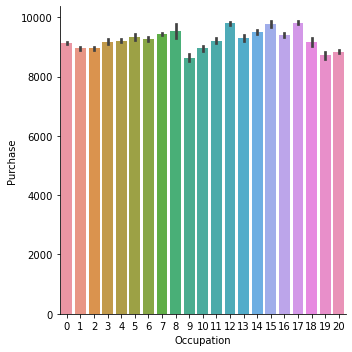

In [55]:
sns.catplot(x="Occupation", y="Purchase", kind="bar", data=train_file)
#most of them have purchased equaly 

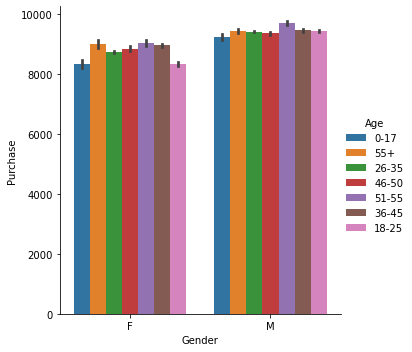

In [56]:
sns.catplot(x="Gender", y="Purchase", hue = 'Age', kind="bar", data=train_file)
# so it says that men are purchasing more than women. That too over 50 are buying more

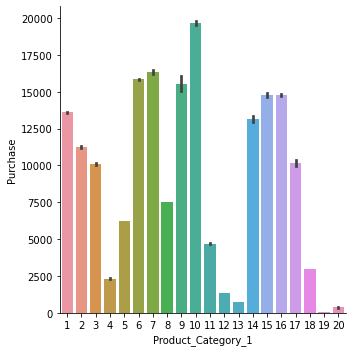

In [57]:
sns.catplot(x="Product_Category_1", y="Purchase", kind="bar", data=train_file)

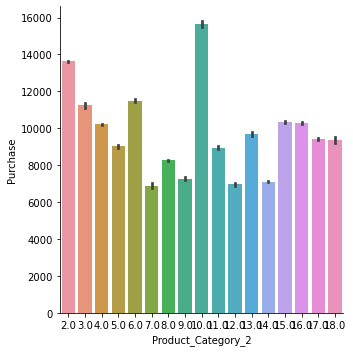

In [58]:
sns.catplot(x="Product_Category_2", y="Purchase", kind="bar", data=train_file)

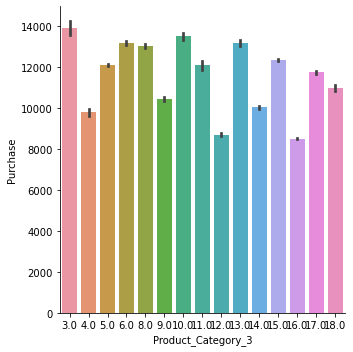

In [59]:
sns.catplot(x="Product_Category_3", y="Purchase", kind="bar", data=train_file)

In [60]:
print(train_file['Product_Category_1'].unique())
print('___________________________________________')
print(train_file['Product_Category_2'].unique())
print('___________________________________________')
print(train_file['Product_Category_3'].unique())

[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
___________________________________________
[ 8.  6. 14.  2. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
___________________________________________
[16. 14. 17.  5.  4. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [61]:
pd.pivot_table(train_file,index=["Product_Category_2"], columns='Age')

Marital_Status                                          \
Age                          0-17     18-25     26-35     36-45     46-50   
Product_Category_2                                                          
2.0                           0.0  0.193963  0.396663  0.367803  0.758218   
3.0                           0.0  0.209302  0.390101  0.360078  0.777778   
4.0                           0.0  0.210927  0.418834  0.389687  0.745763   
5.0                           0.0  0.207583  0.399394  0.390890  0.736869   
6.0                           0.0  0.215876  0.387242  0.398480  0.738959   
7.0                           0.0  0.207547  0.396947  0.386861  0.698113   
8.0                           0.0  0.219183  0.392793  0.406334  0.713924   
9.0                           0.0  0.214545  0.398760  0.383874  0.713235   
10.0                          0.0  0.246193  0.405771  0.439883  0.711039   
11.0                          0.0  0.212111  0.399392  0.353331  0.741284   
12.0                          0.0  0.229746  0.382324  0.415768  0.745614   
13.0                          0.0  0.207711  0.377186  0.410828  0.699616   
14.0                          0.0  0.212775  0.376500  0.415245  0.697896   
15.0                          0.0  0.205917  0.400876  0.372481  0.745340   
16.0                          0.0  0.202158  0.394468  0.389328  0.723535   
17.0                          0.0  0.194776  0.374168  0.402398  0.708738   
18.0                          0.0  0.235119  0.383562  0.364650  0.718121   

                                       Occupation                      \
Age                    51-55       55+       0-17     18-25     26-35   
Product_Category_2                                                      
2.0                 0.732692  0.576384   8.799859  7.069855  8.074072   
3.0                 0.742647  0.593023   9.280000  6.644961  7.923658   
4.0                 0.720152  0.655224   9.155903  6.503477  7.759979   
5.0                 0.738961  0.625175   9.125483  6.864865  7.972338   
6.0                 0.706491  0.606349   8.610354  6.905776  8.056960   
7.0                 0.815789  0.500000   8.000000  5.556604  8.114504   
8.0                 0.711921  0.651809   8.664846  6.632150  7.827989   
9.0                 0.769461  0.619403   8.923077  6.823636  7.876033   
10.0                0.642623  0.690722  10.000000  7.246193  8.401262   
11.0                0.709512  0.656338   8.831579  7.042561  8.001013   
12.0                0.751101  0.615646   8.475610  6.382104  8.035750   
13.0                0.757322  0.647149   9.044534  6.872512  7.801618   
14.0                0.717765  0.605535   8.479259  6.401227  7.576748   
15.0                0.740366  0.602518   8.473849  7.108831  8.310485   
16.0                0.706717  0.627564   9.047619  6.849577  7.929889   
17.0                0.700896  0.635456   7.892473  6.739920  8.121048   
18.0                0.728997  0.641256   7.700000  6.889881  8.202055   

                                                              \
Age                    36-45     46-50      51-55        55+   
Product_Category_2                                             
2.0                 9.079609  9.196686   9.258654   9.838559   
3.0                 9.001957  8.724868  10.088235   8.720930   
4.0                 8.632963  8.559869   9.507224   8.823881   
5.0                 8.960872  8.312533   9.075325   9.510490   
6.0                 8.846056  8.563880   8.968956  10.128571   
7.0                 8.467153  7.735849   7.263158   8.100000   
8.0                 8.767151  8.415086   8.649033   9.408244   
9.0                 9.063103  8.031863   8.712575   9.522388   
10.0                8.913490  7.909091   9.377049   8.510309   
11.0                8.978285  8.657798   8.685090  10.307042   
12.0                8.092116  7.542105   8.958150   8.163265   
13.0                8.481802  8.386756   8.835774   9.624037   
14.0                8.530270  8.290195   8.545129   9.142

In [62]:
train_file.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969


# Need to check for lasso ridge median or mode or mean outlier corr etc

In [63]:
train_file.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [64]:
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()

# Applying Label encoder on City_Category, Age & Gender

In [65]:
train_file['Gender'] = LE.fit_transform(train_file['Gender'])

In [66]:
train_file['Age'] = LE.fit_transform(train_file['Age'])
train_file['City_Category'] = LE.fit_transform(train_file['City_Category'])

In [67]:
train_file

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,0,2,0,3,8.0,16.0,8370
1,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,P00087842,0,0,10,0,2,0,12,8.0,16.0,1422
3,P00085442,0,0,10,0,2,0,12,14.0,16.0,1057
4,P00285442,1,6,16,2,4+,0,8,8.0,16.0,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,5,13,1,1,1,20,8.0,16.0,368
550064,P00375436,0,2,1,2,3,0,20,8.0,16.0,371
550065,P00375436,0,2,15,1,4+,1,20,8.0,16.0,137
550066,P00375436,0,6,1,2,2,0,20,8.0,16.0,365


In [68]:
len(train_file['Product_ID'].unique())

3631

In [69]:
train_file.tail(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,P00372445,1,5,13,1,1,1,20,8.0,16.0,368
550064,P00375436,0,2,1,2,3,0,20,8.0,16.0,371
550065,P00375436,0,2,15,1,4+,1,20,8.0,16.0,137
550066,P00375436,0,6,1,2,2,0,20,8.0,16.0,365
550067,P00371644,0,4,0,1,4+,1,20,8.0,16.0,490


In [70]:
train_file_dummie = train_file

In [71]:
Prod = train_file_dummie.Product_ID

In [72]:
Prod.shape

(550068,)

# NO OUTLIERS

# Need to create one more feature which is from Stay_In_Current_City_Years for that we need to remove + from 4+

# We need to remove PO from product ID

In [73]:
train_file.to_csv("One_coded.csv")

# Few EDA has been taken in EXCEL

In [74]:
train_file_excel = pd.read_csv("One_coded.csv")

In [75]:
train_file_excel

,Unnamed: 0,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_ID,Came_in
0,0,0,0,10,0,2,0,3,8,16,8370,69042,2018
1,1,0,0,10,0,2,0,1,6,14,15200,248942,2018
2,2,0,0,10,0,2,0,12,8,16,1422,87842,2018
3,3,0,0,10,0,2,0,12,14,16,1057,85442,2018
4,4,1,6,16,2,4,0,8,8,16,7969,285442,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,550063,1,5,13,1,1,1,20,8,16,368,372445,2019
550064,550064,0,2,1,2,3,0,20,8,16,371,375436,2017
550065,550065,0,2,15,1,4,1,20,8,16,137,375436,2016
550066,550066,0,6,1,2,2,0,20,8,16,365,375436,2018


In [78]:
train_file_excel.columns

Index(['Unnamed: 0', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Product_ID',
       'Came_in'],
      dtype='object')

In [85]:
train_file_excel.drop(['Dropped1'],axis = 1, inplace = True)

In [103]:
train_file_excel

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_ID,Came_in
0,0,0,10,0,2,0,3,8,16,8370,69042,2018
1,0,0,10,0,2,0,1,6,14,15200,248942,2018
2,0,0,10,0,2,0,12,8,16,1422,87842,2018
3,0,0,10,0,2,0,12,14,16,1057,85442,2018
4,1,6,16,2,4,0,8,8,16,7969,285442,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,1,20,8,16,368,372445,2019
550064,0,2,1,2,3,0,20,8,16,371,375436,2017
550065,0,2,15,1,4,1,20,8,16,137,375436,2016
550066,0,6,1,2,2,0,20,8,16,365,375436,2018


# Heatmap correction

In [96]:
import seaborn as sns

In [102]:
X

array([[-1.74651251, -1.84424754,  0.29486356, ...,  0.36879231,
        -1.02877366, -0.10980142],
       [-1.74651251, -1.84424754,  0.29486356, ..., -0.36117636,
         0.72213886, -0.10980142],
       [-1.74651251, -1.84424754,  0.29486356, ...,  0.36879231,
        -0.84579893, -0.10980142],
       ...,
       [-1.74651251, -0.36673935,  1.06142262, ...,  0.36879231,
         1.95326687, -1.66086068],
       [-1.74651251,  2.58827703, -1.08494277, ...,  0.36879231,
         1.95326687, -0.10980142],
       [-1.74651251,  1.11076884, -1.23825458, ...,  0.36879231,
         1.91636048, -1.66086068]])

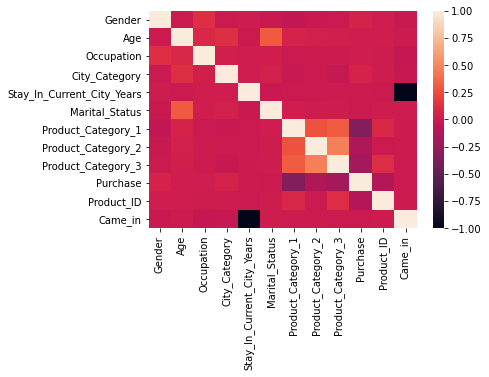

In [105]:
#cor = X.corr()
sns.heatmap(train_file_excel.corr())

# No corr

In [87]:
X = train_file_excel.drop(['Purchase'], axis = 1)

In [92]:
y = train_file_excel.Purchase

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [90]:
X = scaler.fit_transform(X)

In [93]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.75)

In [115]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

In [108]:
LR = LinearRegression()
LR_model = LR.fit(train_X, train_y)

In [109]:
LR_pred = LR_model.predict(test_X)

In [110]:
print(LR_pred)

[ 6330.46211749 10876.66914874 10309.49336749 ...  8188.11836749
 11028.89961749  8377.91914874]


In [111]:
LR_MSE = mean_squared_error(test_y, LR_pred)

In [112]:
LR_MSE

21825428.252356183

In [113]:
import math

In [114]:
math.sqrt(LR_MSE)

4671.769285009287

In [116]:
LR_MAE = mean_absolute_error(test_y, LR_pred)

In [117]:
LR_MAE

3570.9174421420225

# Trying RandomForest

In [197]:
RF = RandomForestRegressor(
    n_estimators=25,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=7,
    min_weight_fraction_leaf=0.0001,
    max_features='auto',
    max_leaf_nodes=None,
    )

In [198]:
RF_Model = RF.fit(train_X, train_y)

In [199]:
RF_Pred = RF_Model.predict(test_X)

In [200]:
RF_MSE = mean_squared_error(test_y, RF_Pred)

In [201]:
RF_MSE

7411059.112246597

In [202]:
RF_RMSE = math.sqrt(RF_MSE)

In [203]:
RF_RMSE

2722.326048115214